In [17]:
%load_ext autoreload
%autoreload 2

# Autoreload is important, otherwise .py scripts won't be reloaded after changes.

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import data_loader
import re

import common.columns as columns
from common.plots import plot_survived_by_category
from common.selectors import get_survived_counts

from features.title_adder import TitleAdder

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
loader = data_loader.DataLoader()
title_adder = TitleAdder()

train_set, test_set = loader.get_data()

train_set = title_adder.transform(train_set)

In [4]:
train_set.shape, test_set.shape

((891, 12), (418, 11))

In [5]:
train_set.pivot_table(columns.SURVIVED, index=columns.SEX, columns=columns.P_CLASS)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [7]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
counts_by_gender = get_survived_counts(
  train_set,
  [
    (train_set[columns.SEX] == 'male'),
    (train_set[columns.SEX] == 'female')
  ],
  normalize=True
)

counts_by_class = get_survived_counts(
  train_set,
  [train_set[columns.P_CLASS] == x for x in range(1, 4)],
  normalize=True
)

unique_sib_sp_values = np.sort(train_set[columns.SIB_SP].unique())

counts_by_sib_sp = get_survived_counts(
  train_set,
  [train_set[columns.SIB_SP] == x for x in unique_sib_sp_values],
)

unique_parch_values = np.sort(train_set[columns.PARCH].unique())

counts_by_parch = get_survived_counts(
  train_set,
  [train_set[columns.PARCH] == x for x in unique_parch_values],
)

unique_embarked_values = train_set[columns.EMBARKED].dropna().unique()

counts_by_embarked = get_survived_counts(
  train_set,
  [train_set[columns.EMBARKED] == x for x in unique_embarked_values],
  normalize=True
)


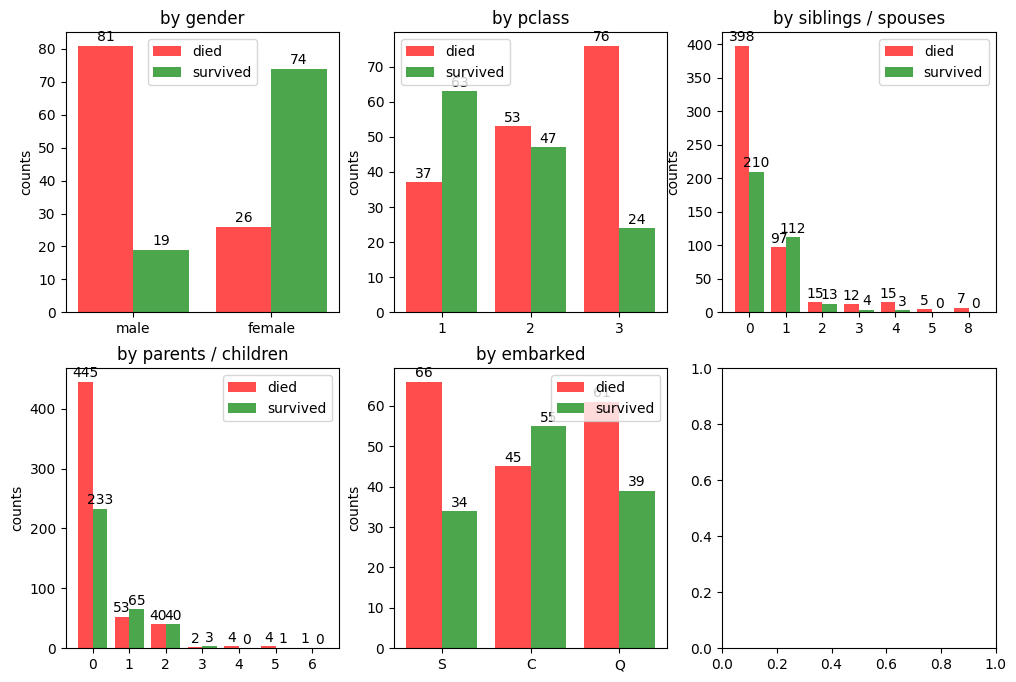

In [14]:
plot_survived_by_category([
  ('by gender', train_set[columns.SEX].unique(), counts_by_gender),
  ('by pclass', [1, 2, 3], counts_by_class),
  ('by siblings / spouses', unique_sib_sp_values, counts_by_sib_sp),
  ('by parents / children', unique_parch_values, counts_by_parch),
  ('by embarked', unique_embarked_values, counts_by_embarked)
])


## Conclusions
- 74% females survived, while only 19% of man did
- 75% of class 3 passengers died, while only 37% of 1 class passengers did
- people without spouses / siblings aboard are more likely to die than people with 1 or 2 spouses / siblings
- people without children / parents board are more likely to die than people with parents or children

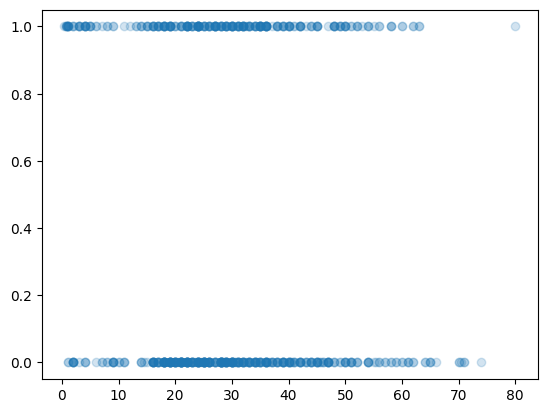

In [10]:
fig, ax = plt.subplots()

ax.scatter(train_set[columns.AGE], train_set[columns.SURVIVED], alpha=0.2)

In [12]:
train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64